# Relatórios 10 e 11

- Gabriel Wendell Celestino Rocha

In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy import stats
import pandas as pd
import scipy as sp
import numpy as np

%matplotlib notebook

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

---

### Atividade 10

In [28]:
Exp10 = pd.read_csv('Exp10.csv')
Exp10

,V,D1,D2
0,3.5,46.350,27.050
1,4.0,44.400,25.825
2,4.5,42.125,24.575
3,5.0,40.575,23.325
4,5.5,38.400,21.700
5,6.0,36.925,21.225


In [30]:
Exp10['r1'] = Exp10['D1']/2
Exp10['r2'] = Exp10['D2']/2
Exp10

,V,D1,D2,r1,r2
0,3.5,46.350,27.050,23.1750,13.5250
1,4.0,44.400,25.825,22.2000,12.9125
2,4.5,42.125,24.575,21.0625,12.2875
3,5.0,40.575,23.325,20.2875,11.6625
4,5.5,38.400,21.700,19.2000,10.8500
5,6.0,36.925,21.225,18.4625,10.6125


In [31]:
Exp10['D1'] = Exp10['D1']*1e-3
Exp10['D2'] = Exp10['D2']*1e-3
Exp10['r1'] = Exp10['D1']/2
Exp10['r2'] = Exp10['D2']/2
Exp10['V'] = Exp10['V']*1e3
Exp10

,V,D1,D2,r1,r2
0,3500.0,0.046350,0.027050,0.023175,0.013525
1,4000.0,0.044400,0.025825,0.022200,0.012913
2,4500.0,0.042125,0.024575,0.021063,0.012287
3,5000.0,0.040575,0.023325,0.020288,0.011662
4,5500.0,0.038400,0.021700,0.019200,0.010850
5,6000.0,0.036925,0.021225,0.018462,0.010613


In [32]:
e = const.elementary_charge
Exp10['E'] = e*Exp10['V']
Exp10

,V,D1,D2,r1,r2,E
0,3500.0,0.046350,0.027050,0.023175,0.013525,5.607618e-16
1,4000.0,0.044400,0.025825,0.022200,0.012913,6.408707e-16
2,4500.0,0.042125,0.024575,0.021063,0.012287,7.209795e-16
3,5000.0,0.040575,0.023325,0.020288,0.011662,8.010883e-16
4,5500.0,0.038400,0.021700,0.019200,0.010850,8.811971e-16
5,6000.0,0.036925,0.021225,0.018462,0.010613,9.613060e-16


In [33]:
m_e = const.electron_mass
Exp10['v'] = np.sqrt(2*Exp10['E']/m_e)
Exp10

,V,D1,D2,r1,r2,E,v
0,3500.0,0.046350,0.027050,0.023175,0.013525,5.607618e-16,3.508809e+07
1,4000.0,0.044400,0.025825,0.022200,0.012913,6.408707e-16,3.751075e+07
2,4500.0,0.042125,0.024575,0.021063,0.012287,7.209795e-16,3.978615e+07
3,5000.0,0.040575,0.023325,0.020288,0.011662,8.010883e-16,4.193829e+07
4,5500.0,0.038400,0.021700,0.019200,0.010850,8.811971e-16,4.398525e+07
5,6000.0,0.036925,0.021225,0.018462,0.010613,9.613060e-16,4.594109e+07


In [34]:
Exp10['lambda'] = const.Planck/(m_e*Exp10['v'])
Exp10

,V,D1,D2,r1,r2,E,v,lambda
0,3500.0,0.046350,0.027050,0.023175,0.013525,5.607618e-16,3.508809e+07,2.073038e-11
1,4000.0,0.044400,0.025825,0.022200,0.012913,6.408707e-16,3.751075e+07,1.939150e-11
2,4500.0,0.042125,0.024575,0.021063,0.012287,7.209795e-16,3.978615e+07,1.828248e-11
3,5000.0,0.040575,0.023325,0.020288,0.011662,8.010883e-16,4.193829e+07,1.734428e-11
4,5500.0,0.038400,0.021700,0.019200,0.010850,8.811971e-16,4.398525e+07,1.653712e-11
5,6000.0,0.036925,0.021225,0.018462,0.010613,9.613060e-16,4.594109e+07,1.583309e-11


In [35]:
R = 65*1e-3
Exp10['2lambdaR'] = 2*R*Exp10['lambda']
Exp10

,V,D1,D2,r1,r2,E,v,lambda,2lambdaR
0,3500.0,0.046350,0.027050,0.023175,0.013525,5.607618e-16,3.508809e+07,2.073038e-11,2.694950e-12
1,4000.0,0.044400,0.025825,0.022200,0.012913,6.408707e-16,3.751075e+07,1.939150e-11,2.520895e-12
2,4500.0,0.042125,0.024575,0.021063,0.012287,7.209795e-16,3.978615e+07,1.828248e-11,2.376722e-12
3,5000.0,0.040575,0.023325,0.020288,0.011662,8.010883e-16,4.193829e+07,1.734428e-11,2.254757e-12
4,5500.0,0.038400,0.021700,0.019200,0.010850,8.811971e-16,4.398525e+07,1.653712e-11,2.149826e-12
5,6000.0,0.036925,0.021225,0.018462,0.010613,9.613060e-16,4.594109e+07,1.583309e-11,2.058302e-12


In [18]:
Exp10.to_csv('Exp10.csv')

In [40]:
x_data = Exp10['r1']
y_data = Exp10['2lambdaR']

deg = 1
p = np.polyfit(x_data, y_data, deg)
m = p[0]  
c = p[1]  
print(f'A reta ajustada tem equação y = {m}x {c:=+}')


n = y_data.size
m = p.size

dof = n - m
alpha = 0.05
tails = 2
t_critical = stats.t.ppf(1 - (alpha / tails), dof)
print('t crítico =', t_critical)



y_model = np.polyval(p, x_data)
model = np.poly1d(p)
y_model = model(x_data)

y_bar = np.mean(y_data)
R2 = np.sum((y_model - y_bar)**2) / np.sum((y_data - y_bar)**2)

print(f'R² = {R2:.2f}')



resid = y_data - y_model
chi2 = sum((resid / y_model)**2)
chi2_red = chi2 / dof
std_err = np.sqrt(sum(resid**2) / dof)
print('Desvio padrão =', std_err)

A reta ajustada tem equação y = 1.3268646031224937e-10x -4.0818095949823863e-13
t crítico = 2.7764451051977987
R² = 0.99
Desvio padrão = 2.4435626990759643e-14


<IPython.core.display.Javascript object>


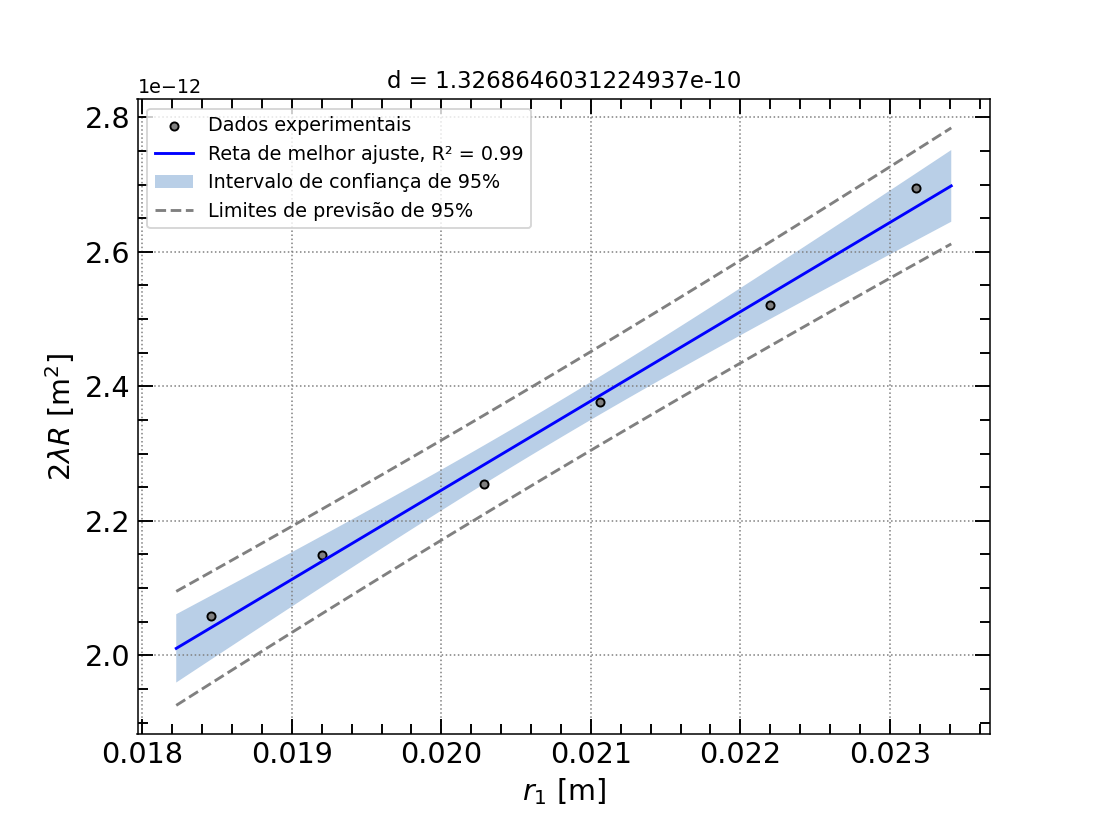

Coeficiente angular =  1.3268646031224937e-10
Coeficiente linear =  -4.0818095949823863e-13


In [41]:
plt.figure(figsize = (8,6))
plt.scatter(x_data, y_data, c = 'gray', marker = 'o', edgecolors = 'k', s = 18, label = 'Dados experimentais')
xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim), color = 'blue', label = f'Reta de melhor ajuste, R² = {R2:.2f}')

x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)

ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.fill_between(
    x_fitted, y_fitted + ci, y_fitted - ci, facecolor = '#b9cfe7', zorder = 0,
    label = r'Intervalo de confiança de 95%')

pi = t_critical * std_err * np.sqrt(1 + 1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.plot(x_fitted, y_fitted - pi, '--', color = '0.5', label = r'Limites de previsão de 95%')
plt.plot(x_fitted, y_fitted + pi, '--', color = '0.5')


plt.legend(loc = 'best')
plt.title(r'd = {:}'.format(p[0]))
plt.xlabel(r'$r_{1}$ [m]', fontsize = 15)
plt.ylabel(r'$2\lambda R$ [m$^{2}$]', fontsize = 15)
opt_plot()
plt.savefig('Fit_d2.png', dpi = 400)

print('Coeficiente angular = ', p[0])
print('Coeficiente linear = ', p[1])

In [48]:
R = 65*1e-3
m_e = const.electron_mass
e = const.elementary_charge
h = const.Planck
r = R
d = 213*1e-12

V = 2 * (R/r)**2 * (h**2/(d**2 * m_e * e))
print('V =', V)

V = 132.61219338904982


In [49]:
R = 65*1e-3
m_e = const.electron_mass
e = const.elementary_charge
h = const.Planck
r = 25*1e-3
d = 80.5*1e-12

V = 2 * (R/r)**2 * (h**2/(d**2 * m_e * e))
print('V =', V)

V = 6276.211934512763


In [53]:
R = (95*1e-3)/2
m_e = const.electron_mass
e = const.elementary_charge
h = const.Planck
r = 45*1e-3
d = 46.5*1e-12

V = 2 * (R/r)**2 * (h**2/(d**2 * m_e * e))
print('V =', V)

V = 3100.265954209044


---

### Atividade 11

In [24]:
Exp11 = pd.read_csv('Exp11.csv')
Exp11

,Vd,V_L,I_L
0,24.7,1.85,1.505
1,51.8,3.74,2.168
2,96.7,5.60,2.716
3,151.2,7.40,3.163
4,217.9,9.26,3.678
5,301.1,11.18,3.890


In [25]:
Exp11['R(t)'] = Exp11['V_L']/Exp11['I_L']
Exp11

,Vd,V_L,I_L,R(t)
0,24.7,1.85,1.505,1.229236
1,51.8,3.74,2.168,1.725092
2,96.7,5.60,2.716,2.061856
3,151.2,7.40,3.163,2.339551
4,217.9,9.26,3.678,2.517673
5,301.1,11.18,3.890,2.874036


In [26]:
R27 = 0.586
alpha = 2.0*1e-3
beta = 1.11*1e-7

R0 = R27/(1 + alpha + beta**2)
R0

0.5848303393213501

In [27]:
def T_Kelvin(alpha, beta, Rt, R0):
    delta = alpha**2 - 4*beta*(1 - Rt/R0)
    t_value = -alpha + np.sqrt(delta)/(2*beta)
    T_Kelvin = t_value + 273
    
    return T_Kelvin

In [28]:
Exp11['T (K)'] = [859.47, 1269.42, 1538.52, 1755.23, 1945.41, 2160.20]
Exp11

,Vd,V_L,I_L,R(t),T (K)
0,24.7,1.85,1.505,1.229236,859.47
1,51.8,3.74,2.168,1.725092,1269.42
2,96.7,5.60,2.716,2.061856,1538.52
3,151.2,7.40,3.163,2.339551,1755.23
4,217.9,9.26,3.678,2.517673,1945.41
5,301.1,11.18,3.890,2.874036,2160.20


In [33]:
Exp11 = pd.read_csv('Exp11_f.csv')
Exp11

,Unnamed: 0,Vd,V_L,I_L,R(t),T (K)
0,1,51.8,3.74,2.168,1.725092,1269.42
1,2,96.7,5.60,2.716,2.061856,1538.52
2,3,151.2,7.40,3.163,2.339551,1755.23
3,4,217.9,9.26,3.678,2.517673,1945.41
4,5,301.1,11.18,3.890,2.874036,2160.20


In [34]:
x_data = np.log10(Exp11['T (K)'])
y_data = np.log10(Exp11['Vd'])

deg = 1
p = np.polyfit(x_data, y_data, deg)
m = p[0]  
c = p[1]  
print(f'A reta ajustada tem equação y = {m}x {c:=+}')


n = y_data.size
m = p.size

dof = n - m
alpha = 0.05
tails = 2
t_critical = stats.t.ppf(1 - (alpha / tails), dof)
print('t crítico =', t_critical)



y_model = np.polyval(p, x_data)
model = np.poly1d(p)
y_model = model(x_data)

y_bar = np.mean(y_data)
R2 = np.sum((y_model - y_bar)**2) / np.sum((y_data - y_bar)**2)

print(f'R² = {R2:.2f}')



resid = y_data - y_model
chi2 = sum((resid / y_model)**2)
chi2_red = chi2 / dof
std_err = np.sqrt(sum(resid**2) / dof)
print('Desvio padrão =', std_err)

A reta ajustada tem equação y = 3.33557747477185x -8.64036229212685
t crítico = 3.182446305284263
R² = 1.00
Desvio padrão = 0.005992773464703003


<IPython.core.display.Javascript object>


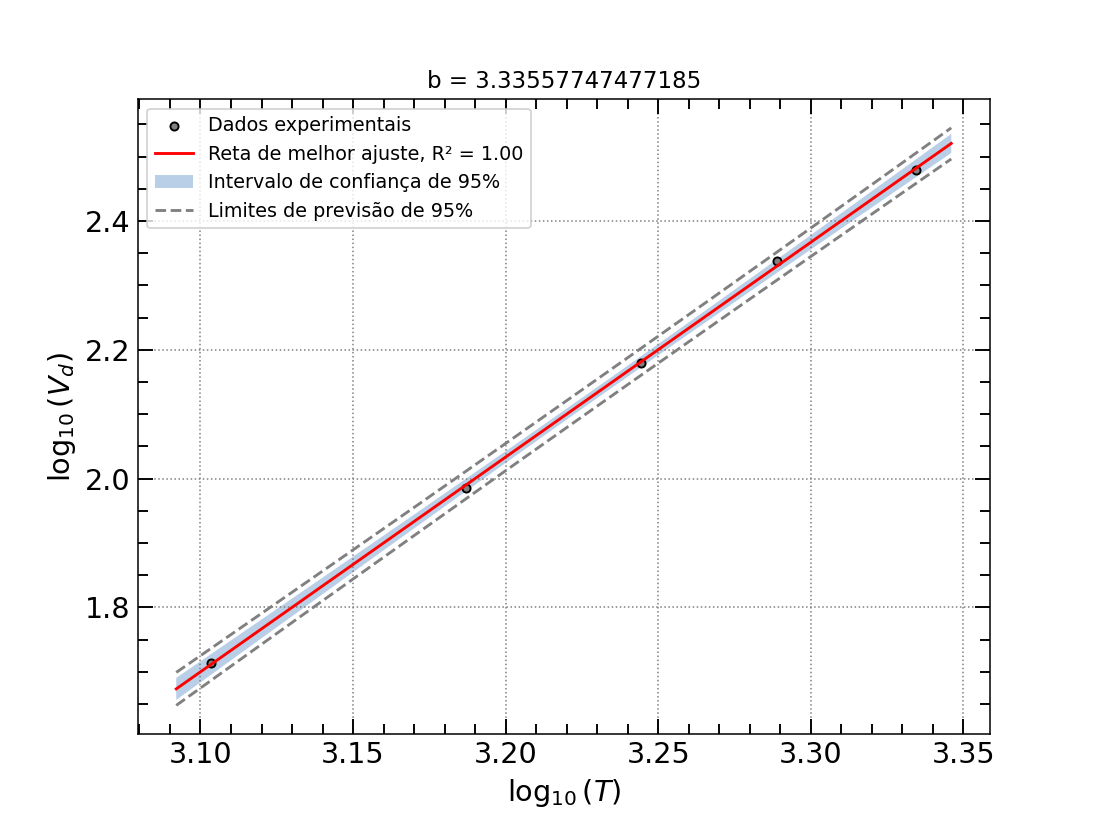

Coeficiente angular =  3.33557747477185
Coeficiente linear =  -8.64036229212685


In [35]:
plt.figure(figsize = (8,6))
plt.scatter(x_data, y_data, c = 'gray', marker = 'o', edgecolors = 'k', s = 18, label = 'Dados experimentais')
xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim), color = 'red', label = f'Reta de melhor ajuste, R² = {R2:.2f}')

x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)

ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.fill_between(
    x_fitted, y_fitted + ci, y_fitted - ci, facecolor = '#b9cfe7', zorder = 0,
    label = r'Intervalo de confiança de 95%')

pi = t_critical * std_err * np.sqrt(1 + 1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.plot(x_fitted, y_fitted - pi, '--', color = '0.5', label = r'Limites de previsão de 95%')
plt.plot(x_fitted, y_fitted + pi, '--', color = '0.5')


plt.legend(loc = 'best')
plt.title(r'b = {:}'.format(p[0]))
plt.xlabel(r'$\log_{10}{(T)}$', fontsize = 15)
plt.ylabel(r'$\log_{10}{(V_d)}$', fontsize = 15)
opt_plot()
plt.savefig('Fit_logVdxlogT_f.png', dpi = 400)

print('Coeficiente angular = ', p[0])
print('Coeficiente linear = ', p[1])